# Titanic - Kaggle

## Data analysis

### First view

In [43]:
# data analysis
import pandas as pd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#display inside notebook
%matplotlib inline 

In [44]:
download_data_train = pd.read_csv("..\download\\train.csv")
download_data_test = pd.read_csv("..\download\\test.csv")

In [45]:
#create new labels
data_train_labels = pd.DataFrame(download_data_train, columns = ['PassengerId', 'Survived'])

In [46]:
#create one table for easier data preparation
download_data_train["trainOrTest"] = "train"
download_data_test["trainOrTest"] = "test"
download_data_train_sub = download_data_train.drop(["Survived"], axis=1)
data_train_test_all = pd.concat([download_data_train_sub, download_data_test])

In [47]:
def find_unique(table_name):
    # Find unique values
    unique = {}
    print("-"*90)
    print('{:<15s}{:10s}{:10s}{:<s}'.format("COLUMN","IS NAN","DISPLAYED","UNIQUE VALUES"))
    print("-"*90)
    for label in table_name.axes[1]:
        unique[label] = table_name[label].unique()
        isnan = ""
        for a in unique[label]:
            try:
                if math.isnan(a):
                    isnan = "HAS NAN"
            except:
                pass
        if len(unique[label]) > 10:
            displayed = "[10/" + str(len(unique[label])) + "]"
            unique_data = str(unique[label][0:10])
        else:
            displayed = "[" + str(len(unique[label])) + "/" + str(len(unique[label])) +"]"
            unique_data = str(unique[label])
        print('{:<15s}{:10s}{:10s}{:<s}'.format(str(label),isnan,displayed,unique_data))
find_unique(data_train_test_all)

------------------------------------------------------------------------------------------
COLUMN         IS NAN    DISPLAYED UNIQUE VALUES
------------------------------------------------------------------------------------------
PassengerId              [10/1309] [ 1  2  3  4  5  6  7  8  9 10]
Pclass                   [3/3]     [3 1 2]
Name                     [10/1307] ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']
Sex                      [2/2]     ['male' 'female']
Age            HAS NAN   [10/99]   [ 22.  38.  26.  35.  nan  54.   2.  27.  14.   4.]
SibSp                    [7/7]     [1 0 3 4 2 5 8]
Parch                    [8/8]     [0 1 2 5 3 4 6 9]
Ticket                   

**NULL** - Age, Fare, Cabin, Embarked <br>
**NOT-NULL** - PassengerId, Pclass, Sex, SibSp, Parch <br>

**Continous data <br>**
-- Age, Fare <br>

**Discrete data <br>**
-- interval - Parch, SibSp <br>
-- ordinal - Pclass<br>
-- categorical - Embarked<br>
--- dichotomous - Sex<br>

**Mixed<br>**
-- Ticket, Cabin, Name

**Unique<br>**
-- PassengerId

In [48]:
data_train_test_all.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [49]:
download_data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,trainOrTest
count,891,891,891,204,889,891
unique,891,2,681,147,3,1
top,"Fox, Mr. Stanley Hubert",male,CA. 2343,C23 C25 C27,S,train
freq,1,577,7,4,644,891


In [50]:
download_data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [51]:
download_data_test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,trainOrTest
count,418,418,418,91,418,418
unique,418,2,363,76,3,1
top,"Willard, Miss. Constance",male,PC 17608,B57 B59 B63 B66,S,test
freq,1,266,5,3,270,418


##### First glance at data significance - discrete data

In [52]:
for column in ['Pclass','Sex', 'Parch', 'SibSp', 'Embarked']:
        print('-'*30)
        print(download_data_train[[column, 'Survived']].groupby(column, as_index=False).mean().sort_values(by='Survived', ascending=False))

------------------------------
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
------------------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
------------------------------
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
------------------------------
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
------------------------------
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


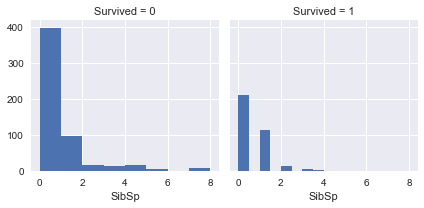

In [53]:
age = sns.FacetGrid(download_data_train, col='Survived')
age.map(plt.hist, 'SibSp', bins=8)

#### First glance at significance - continous data

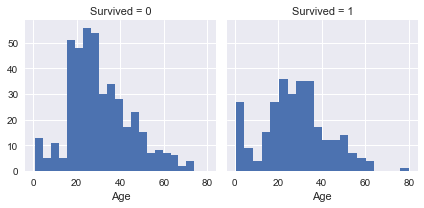

In [54]:
age = sns.FacetGrid(download_data_train, col='Survived')
age.map(plt.hist, 'Age', bins=20)

In [55]:
#fare = sns.FacetGrid(download_data_train, col='Fare')
#fare.map(plt.hist, 'Fare', bins=5)

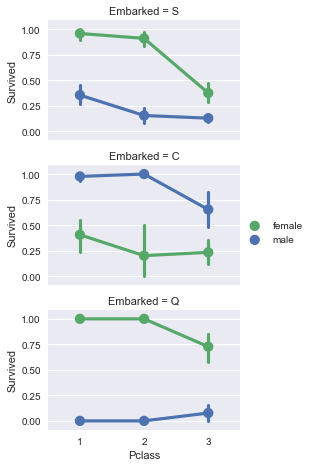

In [56]:
grid = sns.FacetGrid(download_data_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

#### Check if Cabin is significant

     Pclass  Cabin
0         3  Empty
1         1      C
6         1      E
9         2  Empty
10        3      G
21        2      D
23        1      A
30        1  Empty
31        1      B
52        1      D
66        2      F
75        3      F
123       2      E
339       1      T
429       3      E
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 2 columns):
Pclass    1309 non-null int64
Cabin     1309 non-null object
dtypes: int64(1), object(1)
memory usage: 30.7+ KB


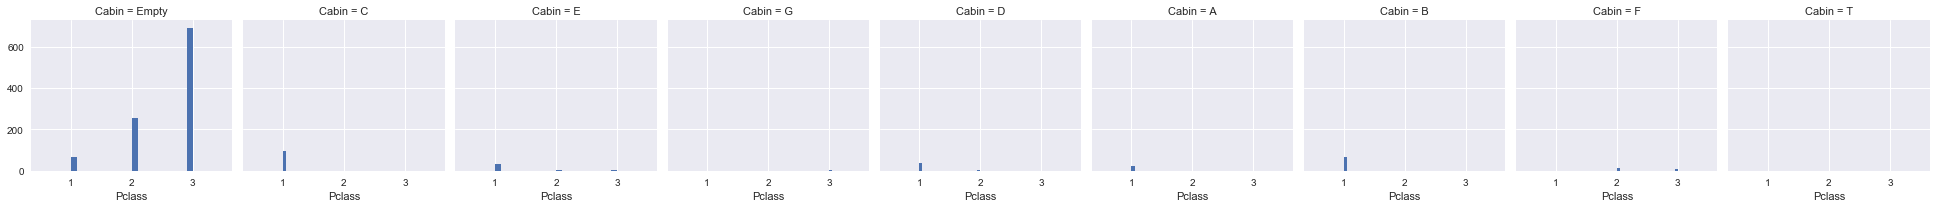

In [57]:
check_labels = pd.DataFrame(data_train_test_all, columns = ['Pclass', 'Cabin'])
check_labels['Cabin'] = check_labels['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else 'Empty')
print(pd.DataFrame.drop_duplicates(check_labels))
check_labels.info()
age = sns.FacetGrid(check_labels, col='Cabin')
age.map(plt.hist, 'Pclass', bins=20)

### Data selection

#### Change to number:

- **Sex** is important factor for survival - especially women havehigher chances for survival <br> -> women 1, men 0

In [58]:
data_train_test_all["Sex"] = data_train_test_all["Sex"].apply(lambda x: 1 if x == "male" else 0)

- **Port of embarkation** could be a factor for survival (but hard to say at this stage) AND we have almost all "Embarkation" (except of 2) -> percentage chances for survival ordering <br>-> C - 2, Q - 1, S -0 ,<br>-> two missing values would be S - because it is most populated embarkation

In [59]:
data_train_test_all["Embarked"] = data_train_test_all["Embarked"].apply(lambda x: 2 if x == "C" else (1 if x == 'Q' else 0))

#### Add

In [60]:
data_train_test_all['Title'] = data_train_test_all.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
print(pd.crosstab(data_train_test_all['Title'], data_train_test_all['Sex']))

Sex         0    1
Title             
Capt        0    1
Col         0    4
Countess    1    0
Don         0    1
Dona        1    0
Dr          1    7
Jonkheer    0    1
Lady        1    0
Major       0    2
Master      0   61
Miss      260    0
Mlle        2    0
Mme         1    0
Mr          0  757
Mrs       197    0
Ms          2    0
Rev         0    8
Sir         0    1


In [61]:
data_train_test_all['Title'] = data_train_test_all['Title'].replace('Mlle', 'Miss')
data_train_test_all['Title'] = data_train_test_all['Title'].replace('Ms', 'Miss')
data_train_test_all['Title'] = data_train_test_all['Title'].replace('Mme', 'Mrs')
data_train_test_all['Title'] = data_train_test_all['Title'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Rare')

In [62]:
# create table to find out if 'Title' is somewhat significant
check_title = pd.merge(data_train_labels, data_train_test_all, on = 'PassengerId')

In [63]:
check_title[['Title', 'Survived']].groupby('Title', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


- Title could have significance - ordered by most survived and Rare at the end <br> -> 4 - Mrs, 3 - Miss, 2 - Master, 1 - Mr, 0 - Rare

In [64]:
title_map = {'Mrs': 4, 'Miss': 3, 'Master': 2, 'Mr' : 1, 'Rare' : 0}
data_train_test_all['Title'] = data_train_test_all['Title'].map(title_map)
data_train_test_all

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,trainOrTest,Title
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,train,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,train,4
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,train,3
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,train,4
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,train,1
5,6,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,1,train,1
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0,train,1
7,8,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,0,train,2
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,0,train,4
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,2,train,4


#### Drop

- **Ticket** has many ununique values and has highly random values with high randomness

In [65]:
data_train_test_all = data_train_test_all.drop(["Ticket"], axis=1)

- **Cabin** has many empty  values and histogram indicates no specific correlation between any remained

In [67]:
data_train_test_all = data_train_test_all.drop(["Cabin"], axis=1)

- **Name** used as 'Title'

In [68]:
data_train_test_all = data_train_test_all.drop(["Name"], axis=1)

In [69]:
find_unique(data_train_test_all)

------------------------------------------------------------------------------------------
COLUMN         IS NAN    DISPLAYED UNIQUE VALUES
------------------------------------------------------------------------------------------
PassengerId              [10/1309] [ 1  2  3  4  5  6  7  8  9 10]
Pclass                   [3/3]     [3 1 2]
Sex                      [2/2]     [1 0]
Age            HAS NAN   [10/99]   [ 22.  38.  26.  35.  nan  54.   2.  27.  14.   4.]
SibSp                    [7/7]     [1 0 3 4 2 5 8]
Parch                    [8/8]     [0 1 2 5 3 4 6 9]
Fare           HAS NAN   [10/282]  [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708]
Embarked                 [3/3]     [0 2 1]
trainOrTest              [2/2]     ['train' 'test']
Title                    [5/5]     [1 4 3 2 0]


#### Age and Fare

In [ ]:
age = sns.FacetGrid(download_data_train, col='Survived')
age.map(plt.hist, 'SibSp', bins=8)